<a href="https://colab.research.google.com/github/emilceinfante/4GeeksAcademy/blob/master/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNA en Python

A continuación veremos cómo podemos implementar RNA (Redes de Neuronas Artificiales) en Python. Para ello, utilizaremos la librería `keras` sobre `tensorflow` (que es lo más común).

### Clasificación de conjuntos de datos textuales

Vamos a utilizar el conjunto de datos de inicio de diabetes de los indios Pima. Este es un conjunto de datos de Machine Learning estándar del repositorio de Machine Learning de UCI. Describe los datos de los registros médicos de los pacientes de los indios Pima y si tuvieron un inicio de diabetes dentro de los cinco años.

#### Paso 1. Lectura del conjunto de datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean-pima-indians-diabetes.csv")

X = total_data.drop("8", axis = 1)
y = total_data["8"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,0,1,2,3,4,5,6,7
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644


In [ ]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: 8, dtype: int64

El conjunto *train* lo utilizaremos para entrenar el modelo, mientras que con el *test* lo evaluaremos para medir su grado de efectividad. Además, generalmente es una buena práctica normalizar los datos antes de entrenar una red neuronal artificial (RNA). Se pueden aplicar dos tipos: de 0 a 1 o de -1 a 1.

#### Paso 2: Inicialización y entrenamiento del modelo

Los modelos en Keras se definen como una secuencia de capas. Creamos un modelo secuencial y agregamos capas una a una hasta que estemos satisfechos con nuestra arquitectura de red.

La capa de entrada siempre tendrá tantas neuronas como variables predictoras. En este caso, tenemos un total de 8 (de la 0 a la 7). A continuación, añadimos dos capas ocultas, una de 12 neuronas y otra de 8. Por último, la cuarta capa, de salida, tendrá una única neurona, ya que el problema es dicotómico. Si fuese de `n` clases, la red tendría `n` salidas.

> Nota: Hemos creado una red por defecto con capas ocultas y neuronas en cada capa oculta aleatorias. Normalmente se suele empezar así y a continuación hacer una optimización de hiperparámetros.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

model = Sequential()
model.add(Dense(12, input_shape = (8,), activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

A continuación, una vez que el modelo está definido, podemos compilarlo. El backend elige automáticamente la mejor manera de representar la red para entrenar y hacer predicciones para ejecutar en su hardware, como CPU o GPU o incluso distribuido.

Al compilar, debemos especificar algunas propiedades adicionales requeridas al entrenar la red. Recordemos que entrenar una red significa encontrar el mejor conjunto de pesos para asignar entradas a salidas en nuestro conjunto de datos.

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

Definiremos el optimizador conocido como `adam`. Esta es una versión popular del descenso de gradiente porque se sintoniza automáticamente y brinda buenos resultados en una amplia gama de problemas. Recopilaremos e informaremos la precisión de la clasificación, definida a través del argumento de las métricas.

El entrenamiento ocurre en **épocas** (*epoch*) y cada época se divide en **lotes** (*batch*).

- **Epoch**: Una pasada por todas las filas del conjunto de datos de entrenamiento.
- **Batch**: Una o más muestras consideradas por el modelo dentro de una época antes de que se actualicen los pesos.

El proceso de entrenamiento se ejecutará durante un número fijo de iteraciones, que son las épocas. También debemos establecer la cantidad de filas del conjunto de datos que se consideran antes de que se actualicen los pesos del modelo dentro de cada época, lo que se denomina tamaño de batch y se establece mediante el argumento `batch_size` (tamaño_lote).

Para este problema, ejecutaremos una pequeña cantidad de epochs (150) y usaremos un tamaño de batch relativamente pequeño de 10:

In [ ]:
# Ajustar el modelo de keras en el conjunto de datos
model.fit(X_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.4756
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6173
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6873
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7296
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7508
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7541
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7606
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7573
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7655
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7720
Epoch 11/

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

20/20 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8420
Accuracy: 0.8420195579528809


El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

El accuracy del conjunto de entrenamiento es de un `84,20%`.

#### Paso 3: Predicción del modelo

In [ ]:
y_pred = model.predict(X_test)
y_pred[:15]

5/5 [==============================] - 0s 3ms/step


array([[2.6933828e-01],
       [5.7993677e-02],
       [7.6992765e-02],
       [4.8524171e-01],
       [3.1675655e-01],
       [6.4265615e-01],
       [7.3388155e-04],
       [2.8476578e-01],
       [8.7694836e-01],
       [4.1469657e-01],
       [1.6080236e-01],
       [8.2213789e-01],
       [2.1518065e-01],
       [5.3527534e-01],
       [1.2730686e-01]], dtype=float32)

Como vemos, el modelo no devuelve las clases `0` y `1` directamente, sino que requiere de un preprocesamiento previo:

In [ ]:
round(8.8684982e-01)

1

In [ ]:
8.8684982e-01

0.88684982

In [ ]:
y_pred_round = [round(x[0]) for x in y_pred]
y_pred_round[:15]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0]

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_round)

0.7272727272727273

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio.

In [ ]:
model.save("keras_8-12-8-1_42.keras")

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos qué arquitectura tiene (en este caso decimos `8-12-8-1` porque tiene 8 neuronas en la capa de entrada, 12 y 8 en las dos capas ocultas y una neurona en la capa de salida) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.

### Clasificación de conjuntos de imágenes

A continuación se muestra un ejemplo simple de cómo entrenar una red neuronal para clasificar imágenes del dataset MNIST. MNIST es un conjunto de datos de imágenes de dígitos escritos a mano, desde 0 hasta 9.

#### Paso 1. Lectura del conjunto de datos

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los datos (transformamos los valores de los píxeles de 0-255 a 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

Los valores de los píxeles de las imágenes se normalizan para que estén en el rango de 0 a 1 en lugar de 0 a 255.

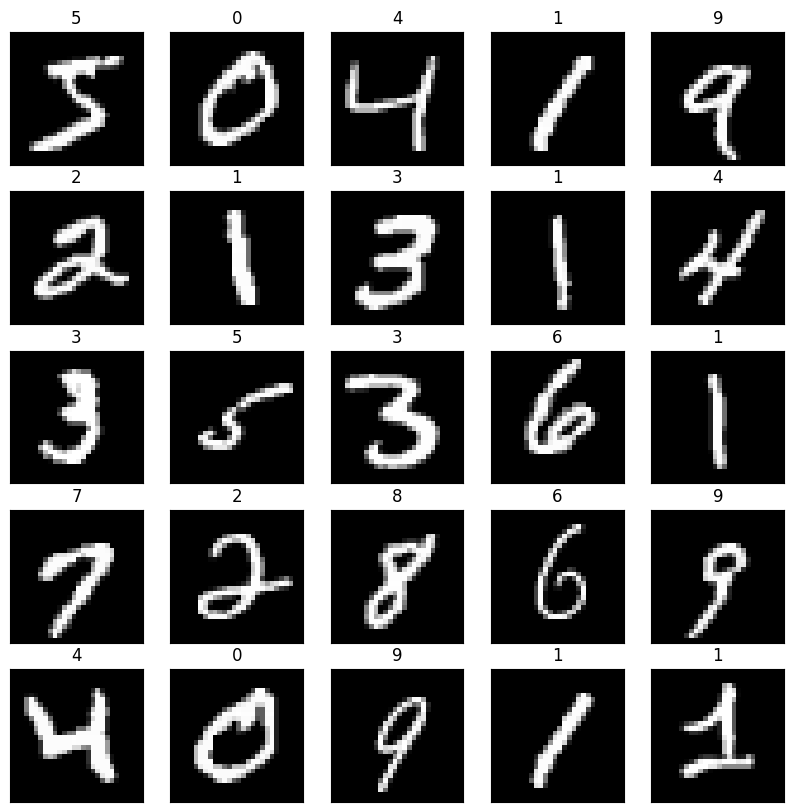

In [ ]:
## Importar liberia matplot...
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Paso 2: Inicialización y entrenamiento del modelo

Se define la arquitectura de la red neuronal. En este caso, estamos utilizando un modelo secuencial simple con una capa de aplanamiento que transforma las imágenes 2D en vectores 1D, una capa densa con 128 neuronas y una capa de salida con 10 neuronas.

A continuación se proporciona una forma alternativa a la anterior para crear una RNA. Ambas son válidas:

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

model = Sequential([
  # Capa que aplana la imagen de entrada de 28x28 píxeles a un vector de 784 elementos
  Flatten(input_shape = (28, 28)),
  # Capa oculta densa con 128 neuronas y función de activación ReLU
  Dense(128, activation = "relu"),
  # Capa de salida con 10 neuronas (una para cada dígito del 0 al 9)
  Dense(10)
])

También añadimos el compilador de la red para definir el optimizador y la función de pérdida, como hicimos anteriormente:

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

Se entrena el modelo en el conjunto de entrenamiento durante un cierto número de épocas. Cuando se trabaja con imágenes es menos común utilizar el parámetro del `batch_size`:

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2530 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1110 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0434 - accuracy: 0.9864


In [ ]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9856
Accuracy: 0.9855666756629944


El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

#### Paso 3: Predicción del modelo

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0848 - accuracy: 0.9742 - 562ms/epoch - 2ms/step

Test accuracy: 0.9742000102996826


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 1ms/step


array([[ -7.250096  , -11.270219  ,  -0.2829588 ,   0.7783994 ,
        -14.667619  ,  -2.7967975 , -15.333657  ,  11.517436  ,
         -3.2836301 ,  -2.4018035 ],
       [ -5.157448  ,   2.6499038 ,  14.9263    ,  -0.56172967,
        -23.658098  ,  -2.5947423 ,  -3.5422313 , -13.337622  ,
         -2.4322865 , -12.6581335 ],
       [ -6.569376  ,   4.610853  ,  -2.0725067 ,  -6.4740553 ,
         -4.124379  ,  -6.7256823 ,  -5.9443965 ,  -0.96518826,
         -1.7405214 ,  -6.3972516 ],
       [  7.7571826 ,  -8.442889  ,  -0.2444451 , -11.833886  ,
        -10.960689  ,  -3.8290703 ,  -3.2302015 ,  -2.691067  ,
        -11.709285  ,  -3.983117  ],
       [ -5.1470575 , -12.162407  ,  -4.0350437 ,  -8.137067  ,
          9.28965   ,  -7.0715623 ,  -4.355254  ,  -0.85851634,
         -4.1321235 ,   2.9564862 ]], dtype=float32)

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio.

In [ ]:
model.save("keras_28x28-128-10_42.keras")

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos qué arquitectura tiene (en este caso ponemos `28x28-128-10` porque tiene una capa de entrada de 28 x 28 píxeles, 128 neuronas en la única capa oculta que tiene y 10 neuronas en la capa de salida) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.